<a href="https://colab.research.google.com/github/kej534923-maker/ECON5200-Applied-Data-Analytics/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
country_codes = ['CHN', 'UMC', 'WLD']
indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [4]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_chn = df.xs('CHN', axis=1, level=0).copy()

Fetching data...


In [5]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chn['Natural_Rate_Unemp'] = df_chn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chn['Productivity'] = df_chn['GDP_Const'] / df_chn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chn['NCO'] = df_chn['Exports_GDP'] - df_chn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chn['Budget_Balance'] = df_chn['Tax_Rev_GDP'] - df_chn['Gov_Exp_GDP']

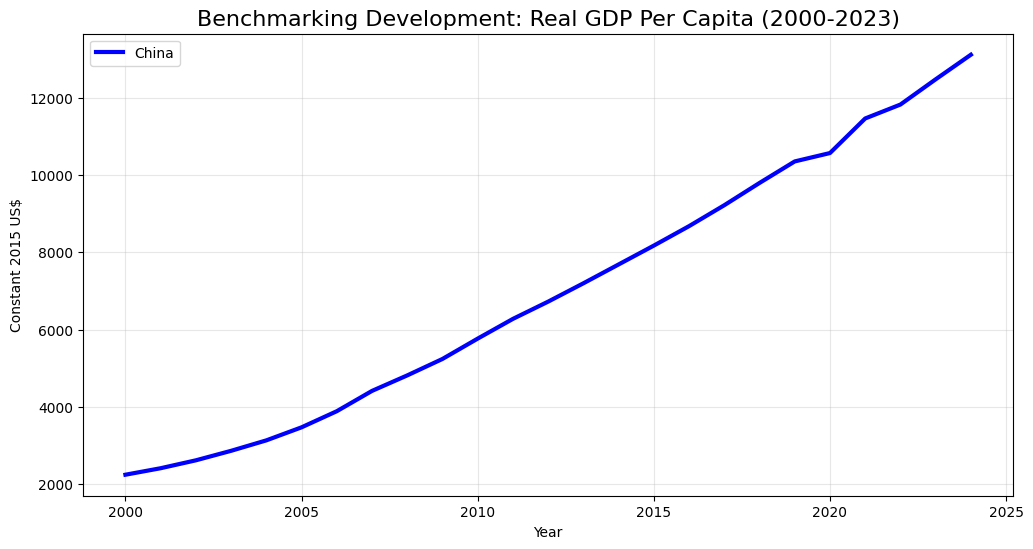

In [6]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

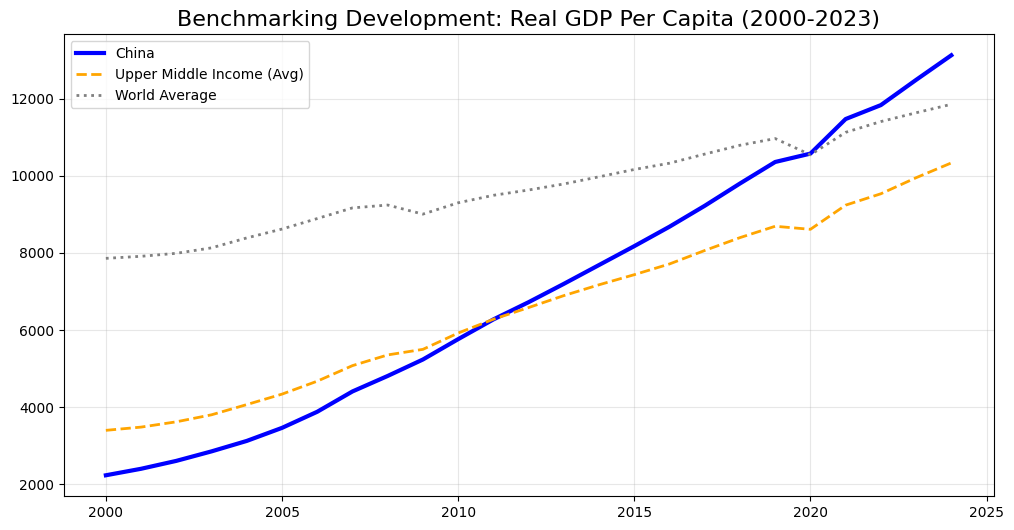

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

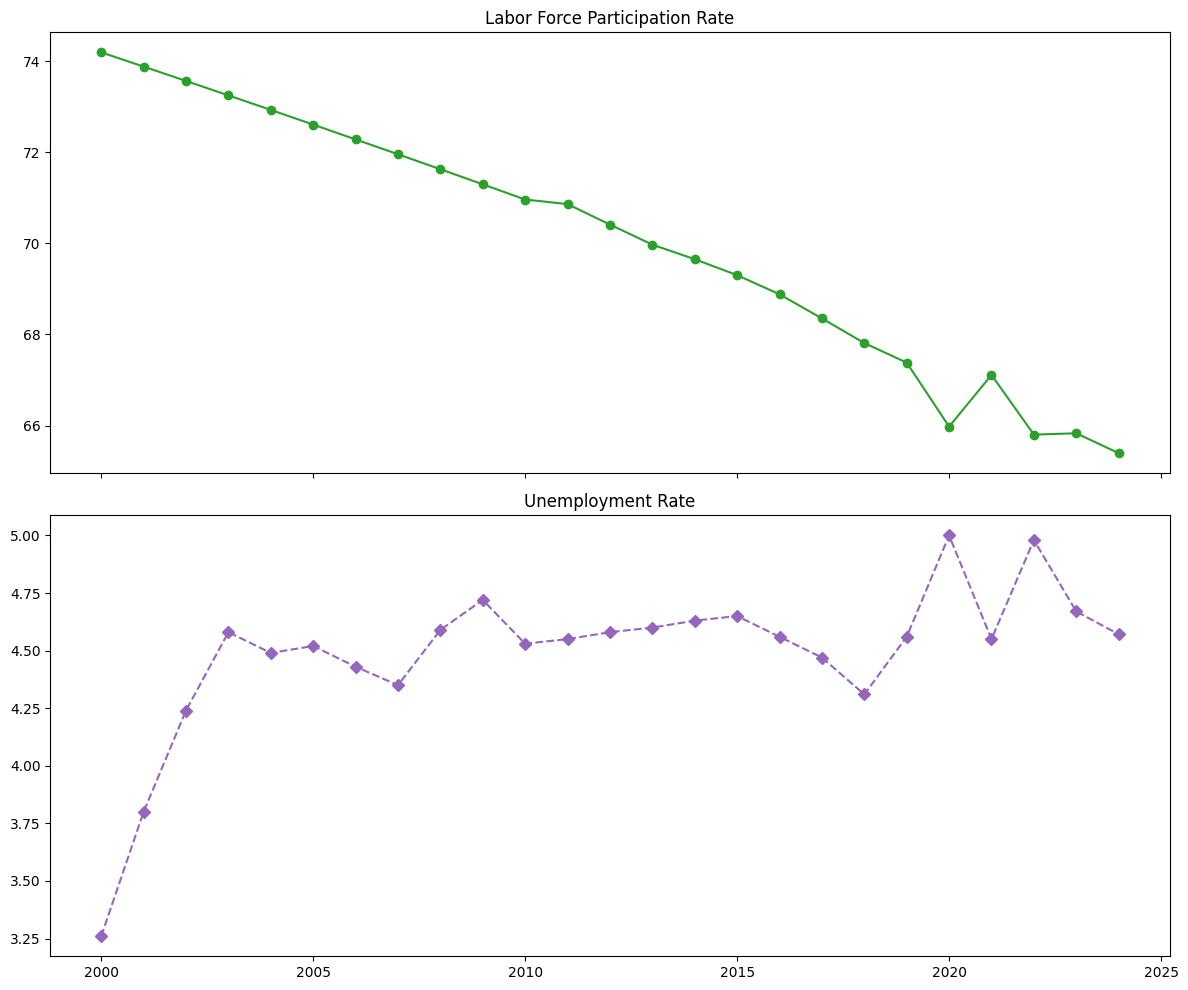

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_chn.index, df_chn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_chn.index, df_chn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

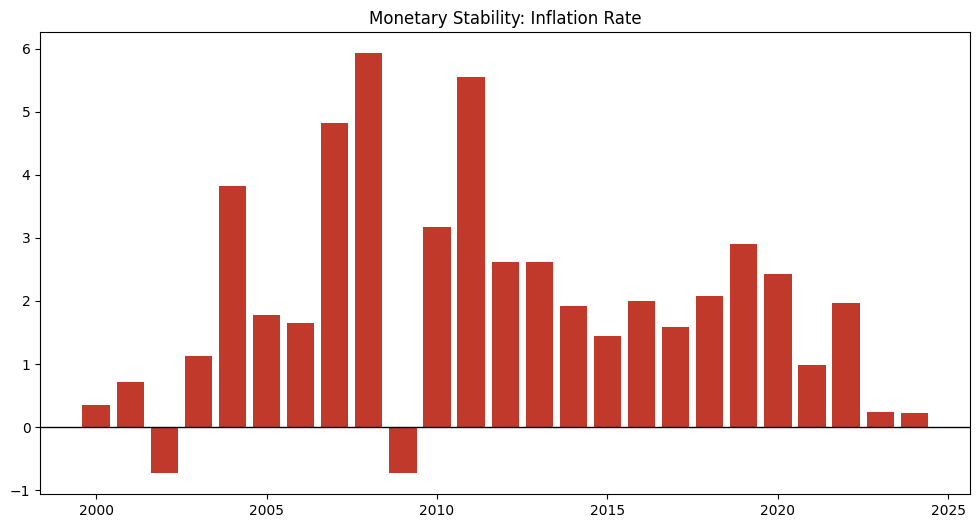

In [9]:
plt.figure(figsize=(12, 6))

plt.bar(df_chn.index, df_chn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

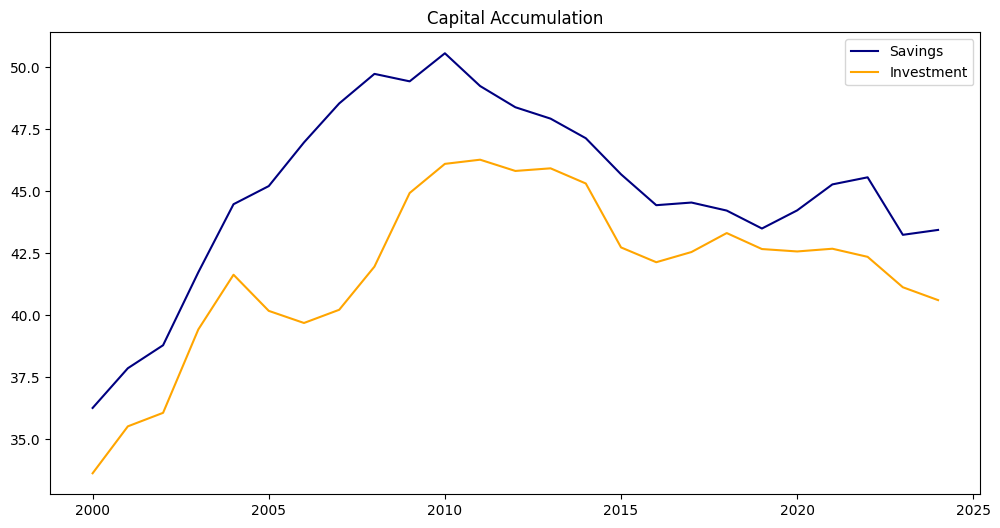

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

In [ ]:
df.describe()

economy           CHN                                                          \
series  Inflation_CPI Tax_Rev_GDP Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
count       25.000000   19.000000   25.000000   25.000000           25.000000   
mean         2.017980    9.057011   16.010298   23.967720           41.817909   
std          1.713471    0.894544    0.869140    5.487755            3.266450   
min         -0.731971    7.517995   14.728917   18.055707           33.632683   
25%          0.981015    8.390932   15.032950   19.526242           40.222088   
50%          1.921642    9.194680   16.223333   22.351823           42.355433   
75%          2.621050    9.837788   16.633262   26.602374           43.313827   
max          5.925251   10.151200   17.603798   35.526847           46.270301   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
count     25.000000  2.500000e+01            25.000000         25.000000   
mean      20.785099  9.591887e+12          6976.270230         45.054673   
std        3.996508  5.019038e+12          3455.136880          3.644696   
min       15.835369  2.825096e+12          2237.442985         36.265233   
25%       17.175504  5.091155e+12          3883.354129         43.496988   
50%       19.842619  9.104483e+12          6723.194438         45.206956   
75%       23.793944  1.374516e+13          9798.652852         47.924777   
max       28.042733  1.848811e+13         13121.676991         50.559149   

economy                  ...         WLD                                  \
series  Labor_Part_Rate  ... Gov_Exp_GDP Exports_GDP Gross_Cap_Formation   
count         25.000000  ...   24.000000   25.000000           25.000000   
mean          70.049640  ...   16.890906   27.764221           25.321547   
std            2.763813  ...    0.455872    2.413079            1.248294   
min           65.393000  ...   15.999621   22.870610           23.026378   
25%           67.810000  ...   16.589361   26.166401           24.462487   
50%           70.410000  ...   16.763255   28.466943           25.411483   
75%           72.280000  ...   17.069772   29.569383           26.330405   
max           74.190000  ...   18.031682   30.892431           27.472995   

economy                                                                   \
series  Imports_GDP     GDP_Const GDP_Per_Capita_Const Gross_Dom_Savings   
count     25.000000  2.500000e+01            25.000000         25.000000   
mean      27.148855  7.033807e+13          9709.508147         25.646443   
std        2.171091  1.464516e+13          1206.163747          1.554973   
min       22.913313  4.842569e+13          7858.907966         22.700953   
25%       25.566217  5.921035e+13          8890.473329         24.238173   
50%       27.653345  6.911429e+13          9630.064779         26.166088   
75%       28.905748  8.280328e+13         10561.100105         26.686878   
max       30.163759  9.649269e+13         11851.505172         27.906301   

economy                                                      
series  Labor_Part_Rate Labor_Force_Total Unemployment_Rate  
count         25.000000      2.500000e+01         25.000000  
mean          62.344331      3.245568e+09          5.979739  
std            1.352889      2.733310e+08          0.437316  
min           59.768366      2.765727e+09          4.891450  
25%           61.193402      3.041704e+09          5.832356  
50%           62.223632      3.258477e+09          6.064327  
75%           63.584483      3.473724e+09          6.227170  
max           64.511769      3.696282e+09          6.608997  

[8 rows x 36 columns]

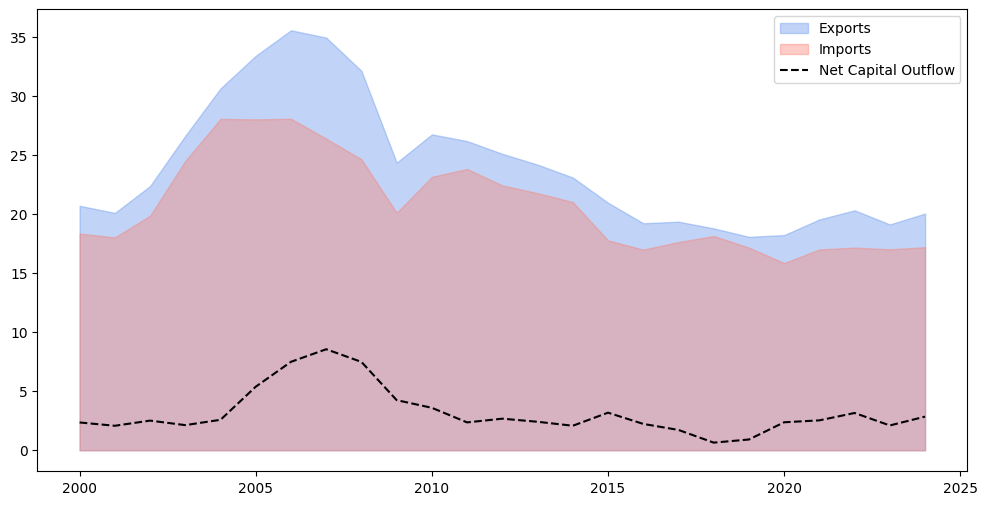

In [11]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

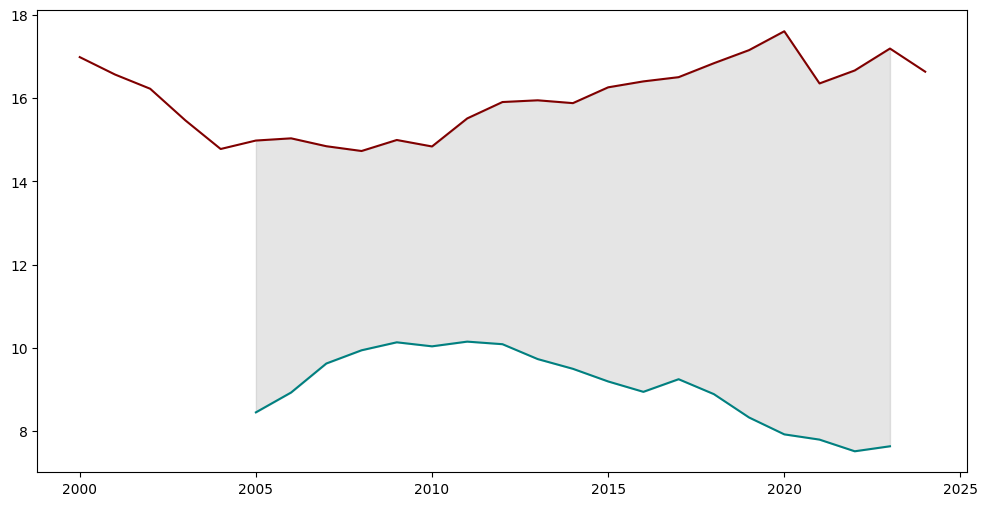

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

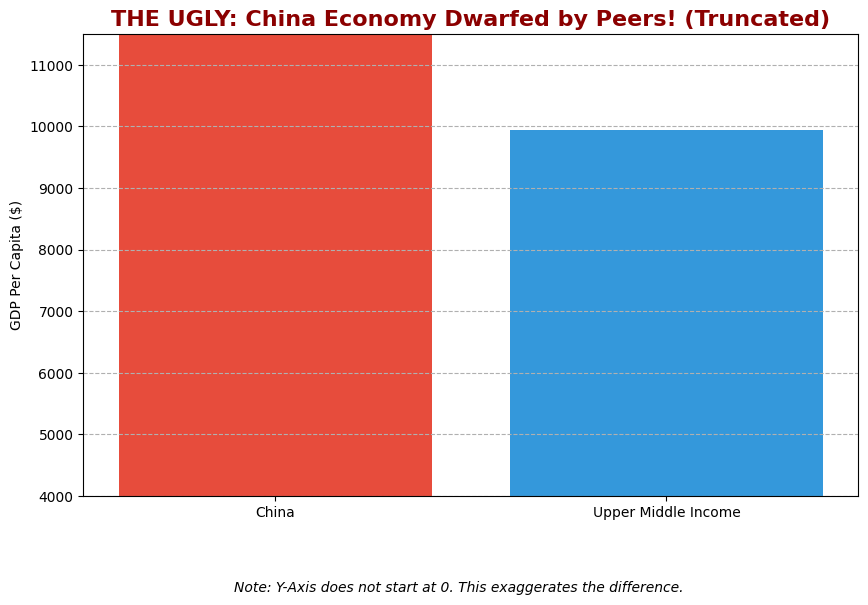

In [13]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
chn_val = df.loc[snapshot_year, ('CHN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [chn_val, umc_val]
labels = ['China', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])


plt.ylim(4000, 11500)

plt.title('THE UGLY: China Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

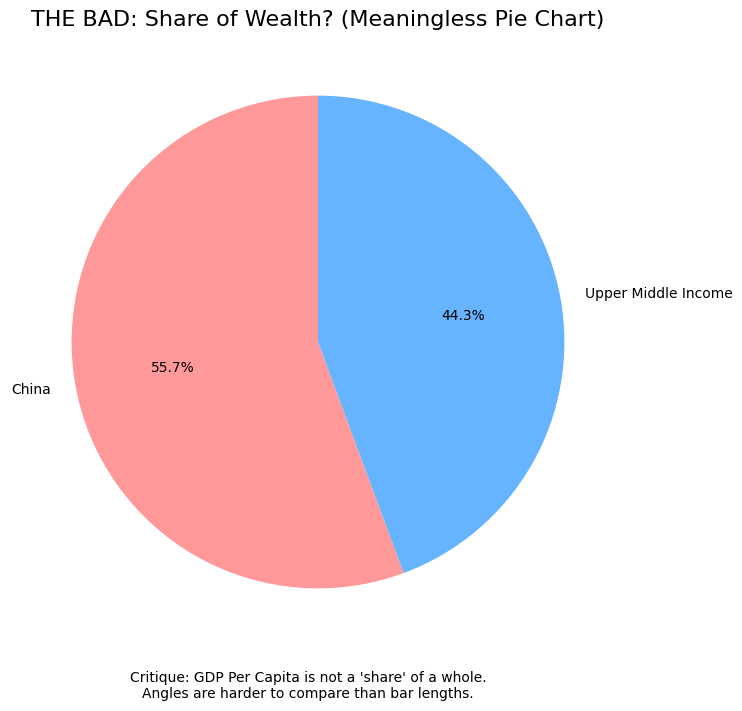

In [14]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()